In [79]:
import pandas as pd
import numpy as np
import copy
import warnings
import datetime
warnings.filterwarnings('ignore')

from mysystem.backtest import internal_data_loader, factor_constructor, factor_test

In [54]:
balance = pd.read_feather('./data/stk_fin_balance.feather')
income = pd.read_feather('./data/stk_fin_income.feather')
cashflow = pd.read_feather('./data/stk_fin_cashflow.feather')

mapping = pd.read_feather('./data/stk_fin_item_map.feather')

In [77]:
income[['stk_id','publish_date','INCOMESTATEMENT_16']]

,stk_id,publish_date,INCOMESTATEMENT_16
0,000001.SZ,1993-08-11,NaN
1,000001.SZ,1994-04-16,NaN
2,000001.SZ,1994-08-30,NaN
3,000001.SZ,1995-03-10,NaN
4,000001.SZ,1995-08-11,NaN
...,...,...,...
242503,873527.BJ,2023-10-30,176000.00
242504,873576.BJ,2023-10-30,NaN
242505,873593.BJ,2023-08-25,553595.52
242506,873593.BJ,2023-10-27,227499.23


In [86]:
income[income['publish_date']>=datetime.datetime(2020,1,2)][income['publish_date']<=datetime.datetime(2022,12,31)].reindex('stk_id')

,stk_id,type,date,adj,publish_date,INCOMESTATEMENT_83,INCOMESTATEMENT_9,INCOMESTATEMENT_19,INCOMESTATEMENT_28,INCOMESTATEMENT_22,...,INCOMESTATEMENT_137,INCOMESTATEMENT_138,INCOMESTATEMENT_109,INCOMESTATEMENT_110,INCOMESTATEMENT_111,INCOMESTATEMENT_121,INCOMESTATEMENT_34,INCOMESTATEMENT_122,INCOMESTATEMENT_36,INCOMESTATEMENT_41
92,000001.SZ,银行,2019-12-31,0,2020-02-14,1.379580e+11,1.379580e+11,1.775490e+11,NaN,4.590300e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,000001.SZ,银行,2020-03-31,0,2020-04-21,3.792600e+10,3.792600e+10,4.787700e+10,NaN,1.158100e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,000001.SZ,银行,2020-06-30,0,2020-08-28,7.832800e+10,7.832800e+10,9.498600e+10,NaN,2.435500e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,000001.SZ,银行,2020-09-30,0,2020-10-22,1.165640e+11,1.165640e+11,1.407810e+11,NaN,3.984300e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,000001.SZ,银行,2020-12-31,0,2021-02-02,1.535420e+11,1.535420e+11,1.871870e+11,NaN,5.329600e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242477,873169.BJ,一般企业,2022-06-30,0,2022-08-24,9.403370e+07,9.403370e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242478,873169.BJ,一般企业,2022-09-30,0,2022-10-28,1.468205e+08,1.468205e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242483,873223.BJ,一般企业,2022-06-30,0,2022-08-25,1.284035e+08,1.284035e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242484,873223.BJ,一般企业,2022-06-30,1,2022-10-31,1.284035e+08,1.284035e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
mapping.set_index('item').loc['公允价值变动收益']

table                                 income
field                     INCOMESTATEMENT_16
english    income_from_changes_in_fair_value
pinyin                             gyjzbdsy1
label                                   None
Name: 公允价值变动收益, dtype: object

当前因子构建进度:20%
当前因子构建进度:40%
当前因子构建进度:60%
当前因子构建进度:80%
当前因子构建进度:100%
正在计算分组收益
正在计算IC
多空组合年化-3.30%，波动16.06%，夏普-0.21，回撤35.03%
纯多头超额收益-0.04%, 多头年化-12.18%，波动21.89%，夏普-0.56，回撤48.04%
RankIC均值-0.0048，RankIC标准差0.1195，IC均值0.0065，IC标准差0.1192，T统计量1.4682，显著性水平(p-value)0.0712


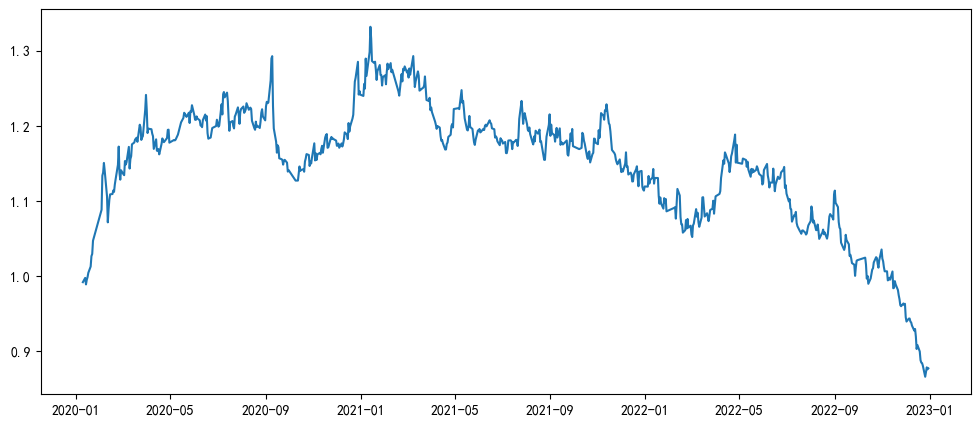

In [38]:
pctdf,data = internal_data_loader.load_processed_prices()

def rolling5(df):
    return df['pct'].rolling(5).mean()

# factor = factor_constructor.get_independent_factor(data,rolling5,start,end)
factor = factor_constructor.get_independent_factor(data,rolling5)
returns = factor_test.single_factor_backtest(pctdf,factor,num_bins=5)

factor_test.show(returns)

In [3]:
data[list(data.keys())[0]]

,stk_id,date,open,high,low,close,volume,amount,cumadj,pct
0,000001.SZ,2020-01-02,16.65,16.95,16.55,16.87,153023000.0,2.571200e+09,98.0986,NaN
1,000001.SZ,2020-01-03,16.94,17.31,16.92,17.18,111619000.0,1.914500e+09,98.0986,0.018209
2,000001.SZ,2020-01-06,17.01,17.34,16.91,17.07,86208400.0,1.477930e+09,98.0986,-0.006423
3,000001.SZ,2020-01-07,17.13,17.28,16.95,17.15,72860800.0,1.247050e+09,98.0986,0.004676
4,000001.SZ,2020-01-08,17.00,17.05,16.63,16.66,84782400.0,1.423610e+09,98.0986,-0.028988
...,...,...,...,...,...,...,...,...,...,...
723,000001.SZ,2022-12-26,12.99,13.04,12.71,12.77,79712000.0,1.021900e+09,102.3820,-0.016311
724,000001.SZ,2022-12-27,12.87,13.22,12.87,13.11,88600400.0,1.160090e+09,102.3820,0.026277
725,000001.SZ,2022-12-28,13.16,13.38,13.00,13.14,79119200.0,1.042400e+09,102.3820,0.002286
726,000001.SZ,2022-12-29,13.07,13.13,12.85,13.03,66689000.0,8.651450e+08,102.3820,-0.008407


In [4]:
factor_test.submit(factor,returns,'momentum','动量因子:移动五日平均')

正在检验相关性和收益情况
最大相关性:0.000
收益过低！拒绝入库


当前因子构建进度:20%
当前因子构建进度:40%
当前因子构建进度:60%
当前因子构建进度:80%
当前因子构建进度:100%
正在计算分组收益
正在计算IC
多空组合年化16.74%，波动12.19%，夏普1.37，回撤10.97%
纯多头超额收益0.02%, 多头年化5.93%，波动20.08%，夏普0.30，回撤34.90%
RankIC均值0.0070，RankIC标准差0.0946，IC均值0.0061，IC标准差0.0711，T统计量2.2042，显著性水平(p-value)0.0139


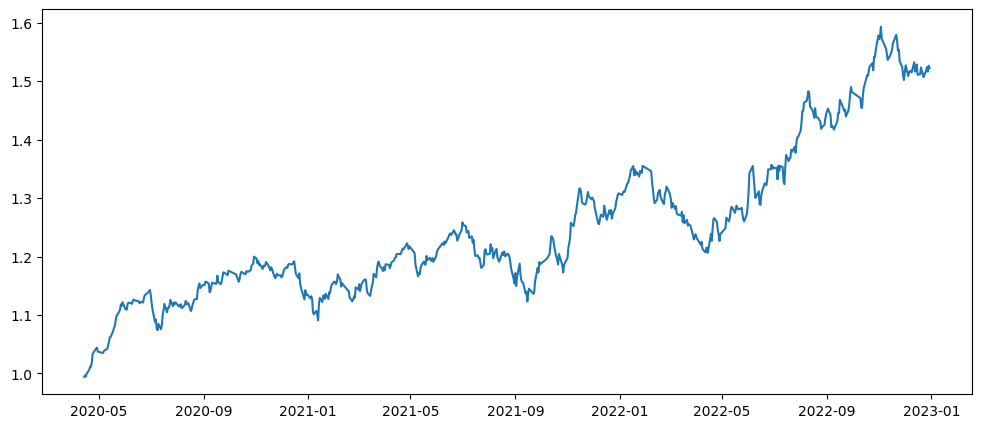

In [8]:
def volume(df):
    return -df['volume'].rolling(66).mean()

factor_test.wrapup_test(pctdf,data,volume,require_returns=True)

In [ ]:
annual_ra_df = result.get_annual_return_statistic()
styles = [
            dict(selector="caption", props=[("font-size", "150%"),
                                            ("text-align", "center")]),
            dict(selector="caption", props=[("caption-side", "bottom")]),
            dict(selector="th", props=[("max-width", "1200px"),
                                       ("text-align", "center")])]
pct_fields = []
float_fields = []
for col in annual_ra_df:
    if '%' in col:
        pct_fields.append(col)
    else:
        float_fields.append(col)
annual_ra_df.style.format("{:.2%}", subset=pct_fields) \
            .format("{:.2}", subset=float_fields) \
            .set_properties(**{'max-width': '1000px', 'font-size': '11pt'}) \
            .set_caption("净值评价") \
            .set_table_styles(styles) \
            .bar(align='mid', color=['#5fba7d', '#d65f5f'])

NameError: name 'result' is not defined

In [3]:
import os

In [15]:
d = pd.read_feather('./daily_risk_byday/20200103.ftr')
def f(x):
    if x[-1] == 'G':
        return x[:-4] + 'SH'
    else:
        return x[:-4] + 'SZ'
d['order_book_id'] = d['order_book_id'].apply(f)
names = d.columns[2:]
names

Index(['momentum', 'beta', 'book_to_price', 'earnings_yield', 'liquidity',
       'size', 'residual_volatility', 'non_linear_size', 'comovement',
       'leverage', 'growth', '银行', '计算机', '环保', '商贸零售', '电力设备', '建筑装饰', '建筑材料',
       '农林牧渔', '电子', '交通运输', '汽车', '纺织服饰', '医药生物', '房地产', '通信', '公用事业', '综合',
       '机械设备', '石油石化', '有色金属', '传媒', '家用电器', '基础化工', '非银金融', '社会服务', '轻工制造',
       '国防军工', '美容护理', '煤炭', '食品饮料', '钢铁'],
      dtype='object')

In [16]:
pctdf.fillna(0)

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,872392.BJ,872808.BJ,872925.BJ,873001.BJ,873122.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.018209,-0.015787,0.000895,0.003178,0.014706,-0.004197,0.010724,-0.039821,0.000000,-0.002105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-06,-0.006423,-0.016992,-0.027214,0.000000,-0.003656,-0.003158,-0.005348,0.095311,0.005848,-0.010593,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-07,0.004676,0.007903,0.015965,0.015748,0.005479,0.003158,0.015958,0.016901,0.031566,0.016896,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-08,-0.028988,-0.002522,-0.014585,-0.015748,-0.018383,-0.011633,-0.018642,-0.007009,-0.008511,-0.027603,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,-0.016311,-0.022074,0.012766,0.000000,0.021758,-0.006335,0.008658,0.011957,0.037140,-0.008525,...,0.000000,-0.004037,0.006287,0.000000,0.039221,0.006740,0.000000,-0.005970,-0.003953,0.001235
2022-12-27,0.026277,0.007592,0.025054,0.026810,0.094708,-0.003818,0.008584,-0.028941,0.005204,0.021178,...,0.000000,-0.004793,-0.003488,-0.087010,-0.001716,0.000000,0.005992,0.027561,-0.001973,-0.001235
2022-12-28,0.002286,0.003775,-0.015583,-0.016003,0.025280,0.000000,-0.012903,-0.017278,-0.026258,0.010838,...,0.000000,-0.001849,-0.007717,-0.075790,-0.000864,0.005029,-0.024174,-0.014661,-0.007977,0.001235


In [17]:
import matplotlib.pyplot as plt # 使用包
from sklearn.linear_model import LinearRegression
plt.rcParams['font.family'] = ['SimHei']     # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False   # 防止负号'-'显示异常

In [18]:
output = pd.DataFrame(columns=names,index=os.listdir('./daily_risk_byday/'))

for i in os.listdir('./daily_risk_byday/'):
    
    try:
        d = pd.read_feather('./daily_risk_byday/'+i)
        def f(x):
            if x[-1] == 'G':
                return x[:-4] + 'SH'
            else:
                return x[:-4] + 'SZ'
        d['order_book_id'] = d['order_book_id'].apply(f)
        cur_pct = pctdf.loc[d['datetime'].astype('datetime64[ns]')[0],:]
        
        for j in names:
            cur = d.set_index('order_book_id')
            cur_ret = (cur[j] * cur_pct).dropna().sum() 
            
            # 将两个 Series 合并为一个 DataFrame
            data = pd.concat([cur[j], cur_pct], axis=1)
            data.columns = ['X', 'Y']

            # 删除含有缺失值的行
            data.dropna(subset=['X', 'Y'], inplace=True)
            
            # 获取 X 和 Y 列作为训练数据
            X = data['X'].values.reshape(-1, 1)
            y = data['Y'].values

            # 初始化线性回归模型
            model = LinearRegression()

            # 拟合模型
            model.fit(X, y)

            output.loc[i,j] = model.coef_[0]
    except:
        pass

In [28]:
output.index = pd.Series(output.index).apply(lambda x:pd.to_datetime(x[:-4]))

In [32]:
del output['comovement']

In [33]:
output.dropna().to_csv('daily_risk.csv')

<Axes: >

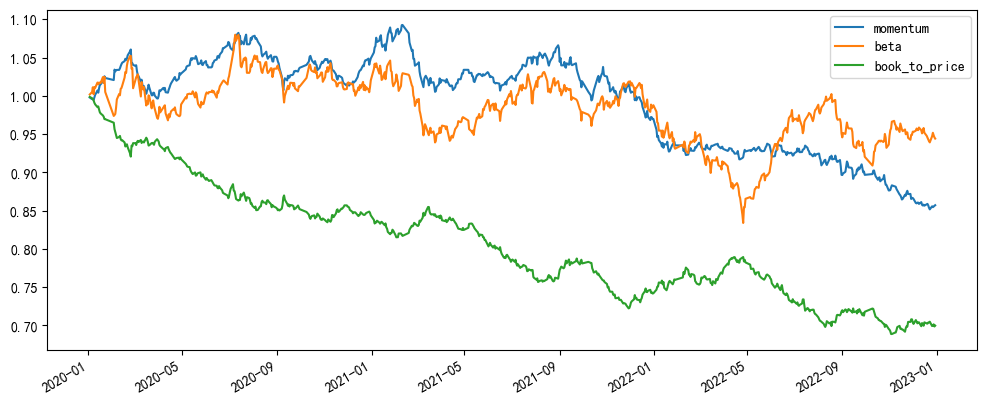

In [35]:
(1+output.iloc[:,:3].dropna()).cumprod().plot(figsize=(12,5))